TASEP
needed time:  47.783995628356934


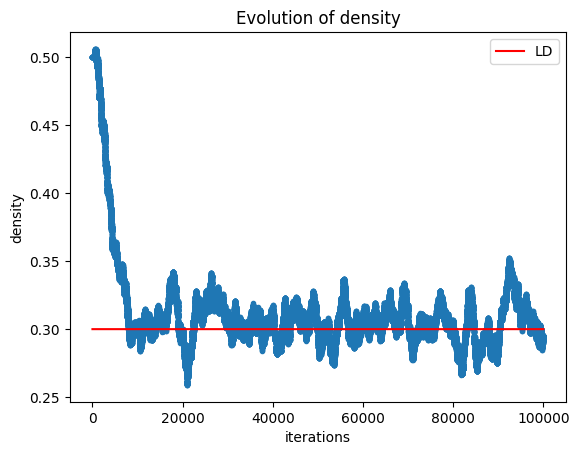

In [2]:
"TASEP"
import functools
import numpy as np
import matplotlib.pyplot as plt
import time
	
def eject(state, beta):
	if state[-1] == 1:
			state[-1] = np.random.choice(2, 1, p=[beta, 1 - beta])[0]
	return state

def hop(state, p):
	# sublattice-parallel update
    # first: (1,2)(3,4)(5,6)...
    # then: (2,3)(4,5)
	# for higher efficiency I tried to loop through occupied sites not all sites
	# generating the random values each is very inefficient
	occupied_sites = np.where(state==1)[0]
	random_val = np.random.choice(2, 2*len(occupied_sites), p=[1 - p, p])
	for index, site in enumerate(occupied_sites):
		if site%2 == 0 and state[site + 1] == 0 and random_val[index] == 1:
			state[site] -= 1
			state[site + 1] += 1
	# last site excluded bc i+1 out of bounds
	occupied_sites = np.where(state[:-1]==1)[0]
	random_val = np.random.choice(2, len(occupied_sites), p=[1 - p, p])
	for index, site in enumerate(occupied_sites):
		if site%2 == 1 and state[site + 1] == 0 and random_val[index] == 1:
			state[site] -= 1
			state[site + 1] += 1
	return state

def inject(state, alpha):
	if state[0] == 0:
			state[0] = np.random.choice(2, 1, p=[1-alpha, alpha])[0]
	return state

def init_state(L, ratio: float, mode='random'):
	'''
	L: number of sites
	ratio: ones/sites
	'''
	one_num = int(L*ratio)
	state = np.zeros(L)
	state[:one_num] = np.ones(one_num)
	if mode == 'random':
		np.random.shuffle(state)
		return state
	elif mode =='lbulk':
		return state
	elif mode =='rbulk':
		return np.flip(state, axis=0)
	else:
		print(mode, 'is unknown. Use ["random", "lbulk", "rbulk"] instead.')

def main():
	print(__doc__)
	L = 1000
	iterations = 100*1000
	occupied_ratio = 0.5

	# [alpha, beta, p, q]
	#probs = [0.6, 0.3, 0.6, 0] # high density phase
	probs = [0.3, 0.6, 0.7, 0] # low density phase
	#probs = [1,1,1,0]

	# create initial state
	state = init_state(L, occupied_ratio, 'lbulk')
	#print(state)
	density = np.zeros(iterations)
	# simulation
	t0 = time.time()
	for i in range(iterations):
		state = eject(state, probs[1])
		# t2 = time.time()
		state = hop(state, probs[2])
		# t3 = time.time()
		#print('hop: ', t3-t2)
		state = inject(state, probs[0])
		# calculate density
		density[i] = np.sum(state)/L
	t1=time.time()
	print('needed time: ', (t1-t0))
	fig = plt.figure()
	ax = fig.add_subplot(111, title='Evolution of density', xlabel='iterations', ylabel='density')
	ax.plot(np.arange(iterations), density, marker='.', lw=0)
	if probs[0] > probs[1] and probs[1] < 0.5:
		ax.plot(np.full((iterations,), 1-probs[1]), color='red', label='HD')
	if probs[0] < probs[1] and probs[0] < 0.5:
		ax.plot(np.full((iterations,), probs[0]), color='red', label='LD')
	elif probs[0] > 0.5 and probs[1] > 0.5:
		ax.plot(np.full((iterations,), 0.5), color='red', label='MC')
	else:
		pass
	ax.legend()
	plt.show()

if __name__=='__main__':
	main()